In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import fkplotlib
fkplotlib.use_txfonts()

<IPython.core.display.Javascript object>


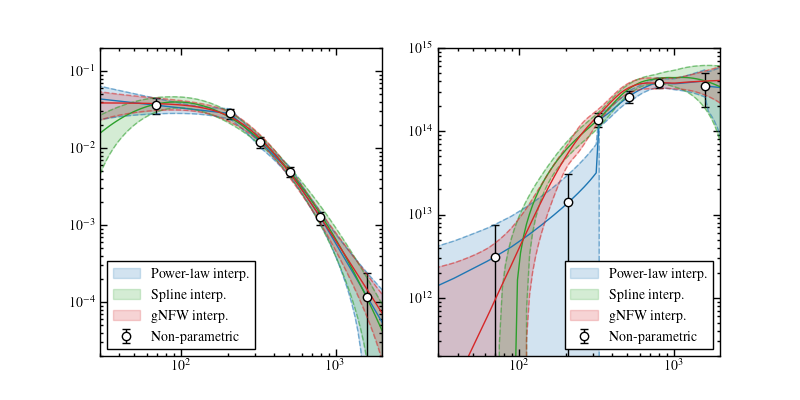

(200000000000.0, 1000000000000000.0)

In [2]:
files = ["Data/thermo_plaw.npz", "Data/thermo_spline.npz", "Data/thermo_gnfw.npz"]
names = ["Power-law interp.", "Spline interp.", "gNFW interp."]
colors = ["tab:blue", "tab:green", "tab:red"]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for k, ax in zip(["p", "m"], axs):
    f = np.load("Data/thermo_np.npz")
    ax.errorbar(
        f["r"], f[k], yerr=np.std(f["all"+k], axis=0), fmt="o", color="k", mfc="w", capsize=3, 
        label="Non-parametric"
    )
    ax.set_xscale("log")
    ax.set_yscale("log")
    for _file, name, color in zip(files, names, colors):
        f = np.load(_file)
        ax.plot(f["r"], f[k], color=color)
        std = np.std(f["all"+k], axis=0)
        ax.fill_between(f["r"], f[k] - std, f[k] + std, color=color, alpha=0.2, label=name)
        for sign in [1.0, -1.0]:
            ax.plot(f["r"], f[k] + sign * std, color=color, ls="--", alpha=0.5)
            
for ax in axs:
    ax.set_xlim(30.0, 1980.0)
    fkplotlib.ax_bothticks(ax)
    fkplotlib.ax_legend(ax)
axs[0].set_ylim(2e-5, 2e-1)
axs[1].set_ylim(2e11, 1e15)

<IPython.core.display.Javascript object>


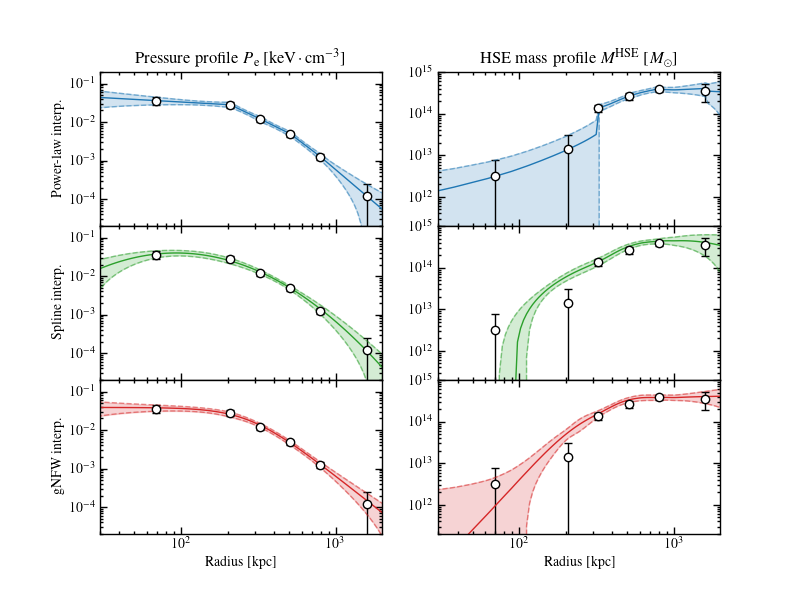

In [3]:
files = ["Data/thermo_plaw.npz", "Data/thermo_spline.npz", "Data/thermo_gnfw.npz"]
names = ["Power-law interp.", "Spline interp.", "gNFW interp."]
colors = ["tab:blue", "tab:green", "tab:red"]

fig, axs = plt.subplots(3, 2, figsize=(8, 6))
for _file, name, color, _axs in zip(files, names, colors, axs):
    f = np.load(_file)
    _axs[0].set_ylabel(name)
    for k, ax in zip(["p", "m"], _axs):
        f_np = np.load("Data/thermo_np.npz")
        ax.errorbar(
            f_np["r"], f_np[k], yerr=np.std(f_np["all"+k], axis=0), fmt="o", color="k", mfc="w", capsize=3, 
            label="Non-parametric"
        )
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.plot(f["r"], f[k], color=color)
        std = np.std(f["all"+k], axis=0)
        ax.fill_between(f["r"], f[k] - std, f[k] + std, color=color, alpha=0.2, label=name)
        for sign in [1.0, -1.0]:
            ax.plot(f["r"], f[k] + sign * std, color=color, ls="--", alpha=0.5)
        


            
for i, _axs in enumerate(axs):
    _axs[0].set_ylim(2e-5, 2e-1)
    _axs[1].set_ylim(2e11, 1e15)
    for ax in _axs:
        ax.set_xlim(30.0, 1980.0)
        fkplotlib.ax_bothticks(ax)
        if i != 2:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Radius [kpc]")
    #fkplotlib.ax_legend(ax)

axs.flatten()[0].set_title(r"Pressure profile $P_{\rm e} \; [{\rm keV \cdot cm^{-3}}]$")
axs.flatten()[1].set_title(r"HSE mass profile $M^{\rm HSE} \; [M_\odot]$")
fig.subplots_adjust(hspace=0)
fig.savefig("demo_plots/interps.pdf")